In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Divar_preproccessed.csv',low_memory=False)

In [3]:
df.shape

(601996, 32)

In [4]:
# df.isna().sum()

In [5]:
# df.head()

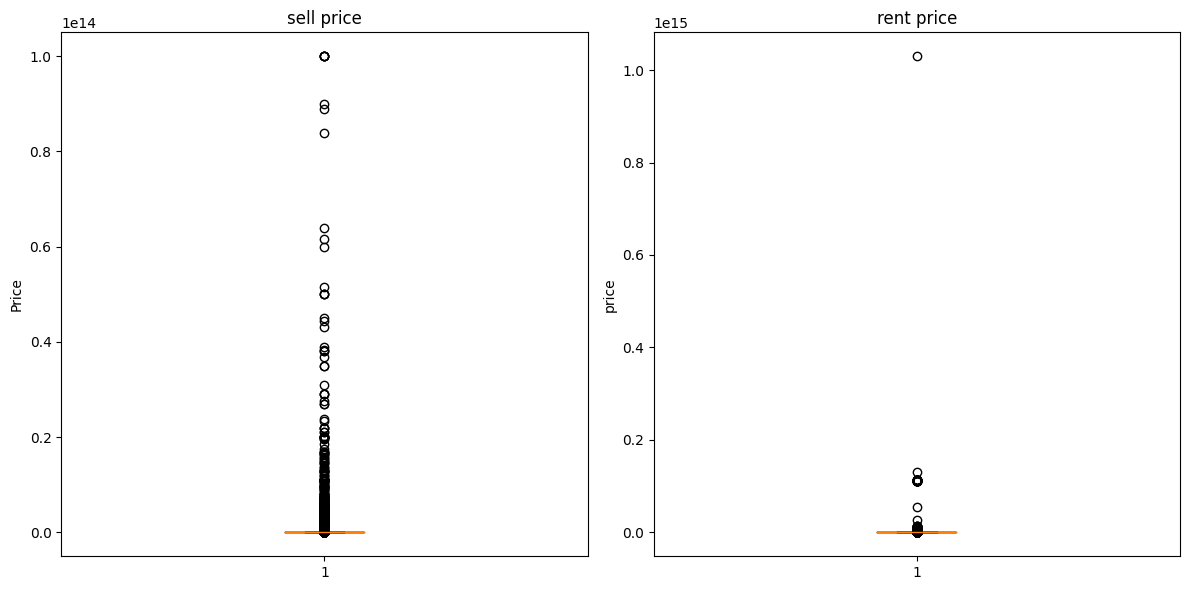

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot(df[df.is_for_sell]['price'])
axes[0].set_title('sell price')
axes[0].set_ylabel('Price')


axes[1].boxplot(df[~df.is_for_sell]['price'])
axes[1].set_title('rent price')
axes[1].set_ylabel('price')

plt.tight_layout()
plt.show()

In [7]:
sell_max = np.max(df[df.is_for_sell]['price'])
sell_min = np.min(df[df.is_for_sell]['price'])
sell_range = sell_max-sell_min

rent_max = np.max(df[~df.is_for_sell]['price'])
rent_min = np.min(df[~df.is_for_sell]['price'])
rent_range = rent_max-rent_min

In [8]:
def balancePrice(row):
    if row.is_for_sell:
        return row.price
    return ((row.price-rent_min) / rent_range)*sell_range + sell_min
df.loc[:, 'price'] = df.apply(balancePrice , axis=1)

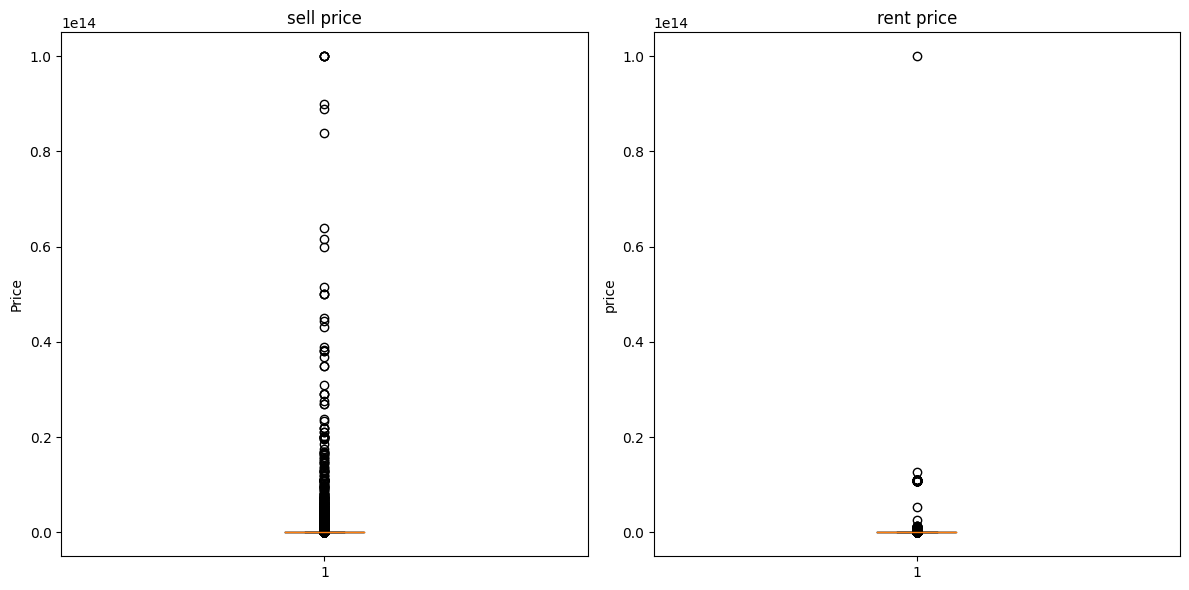

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot(df[df.is_for_sell]['price'])
axes[0].set_title('sell price')
axes[0].set_ylabel('Price')


axes[1].boxplot(df[~df.is_for_sell]['price'])
axes[1].set_title('rent price')
axes[1].set_ylabel('price')

plt.tight_layout()
plt.show()

In [10]:
df = df.drop('Unnamed: 0',axis=1)

In [11]:
df['price'] = np.log1p(df['price'])
df['building_size'] = np.log1p(df['building_size'])

In [12]:
df = df.drop(['created_year','created_month','is_for_sell','construction_year'],axis=1)

In [13]:
# df.var().sort_values()

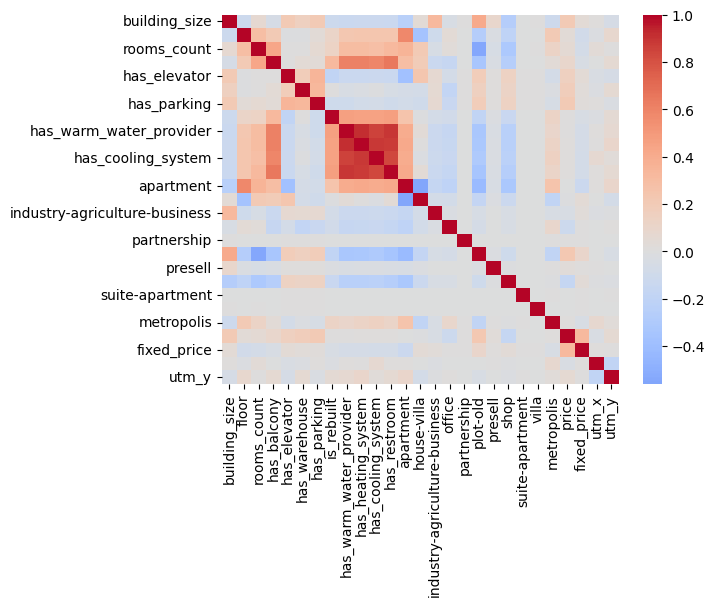

In [14]:
import seaborn as sns

sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.show()

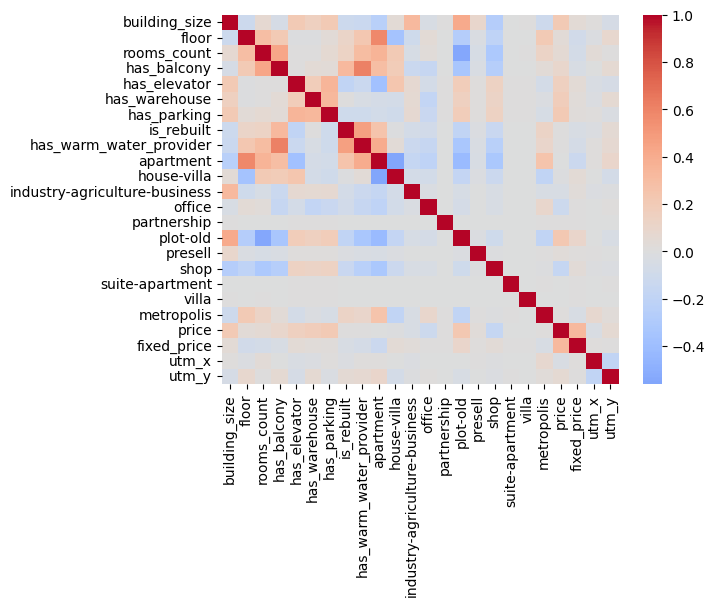

In [15]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
cols = [column for column in upper.columns if any(upper[column] > .7)]
df = df.drop(cols,axis=1)

sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.show()

In [16]:
# df.info()

In [17]:
# import geopandas as gpd
# from shapely.geometry import Point

# gdf = gpd.GeoDataFrame(
#     df, geometry=gpd.points_from_xy(df['utm_x'], df['utm_y']),
#     crs="EPSG:32639"   
# )


# gdf = gdf.to_crs(epsg=4326)
# lons = gdf.geometry.x
# lats = gdf.geometry.y

In [18]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df.describe()

building_size         floor   rooms_count   has_balcony  has_elevator  \
count   6.019960e+05  6.019960e+05  6.019960e+05  6.019960e+05  6.019960e+05   
mean    2.999171e-16  4.384857e-17 -1.178187e-16 -1.374000e-16 -1.121532e-16   
std     1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    -4.126341e+00 -1.208867e+00 -1.506562e+00 -9.428680e-01 -1.987454e+00   
25%    -4.580937e-01 -7.520328e-01 -5.861868e-01 -9.428680e-01  5.031563e-01   
50%    -1.420998e-01 -2.951987e-01  3.341887e-01 -9.428680e-01  5.031563e-01   
75%     2.664444e-01  6.184694e-01  3.341887e-01  1.060594e+00  5.031563e-01   
max     1.154350e+01  1.295299e+01  3.095315e+00  1.060594e+00  5.031563e-01   

       has_warehouse   has_parking    is_rebuilt  has_warm_water_provider  \
count   6.019960e+05  6.019960e+05  6.019960e+05             6.019960e+05   
mean    1.397961e-16 -4.744852e-17  8.118182e-17            -3.643621e-17   
std     1.000001e+00  1.000001e+00  1.000001e+00             1.000001e+00   
min    -2.342843e+00 -2.018725e+00 -5.199983e-01            -8.974918e-01   
25%     4.268318e-01  4.953621e-01 -5.199983e-01            -8.974918e-01   
50%     4.268318e-01  4.953621e-01 -5.199983e-01            -8.974918e-01   
75%     4.268318e-01  4.953621e-01 -5.199983e-01             1.114216e+00   
max     4.268318e-01  4.953621e-01  1.923083e+00             1.114216e+00   

          apartment  ...      plot-old       presell          shop  \
count  6.019960e+05  ...  6.019960e+05  6.019960e+05  6.019960e+05   
mean   4.433250e-17  ...  2.159970e-18  9.100201e-18  1.084706e-16   
std    1.000001e+00  ...  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.168860e+00  ... -3.611632e-01 -3.421713e-02 -2.738693e-01   
25%   -1.168860e+00  ... -3.611632e-01 -3.421713e-02 -2.738693e-01   
50%    8.555343e-01  ... -3.611632e-01 -3.421713e-02 -2.738693e-01   
75%    8.555343e-01  ... -3.611632e-01 -3.421713e-02 -2.738693e-01   
max    8.555343e-01  ...  2.768831e+00  2.922513e+01  3.651377e+00   

       suite-apartment         villa    metropolis         price  \
count     6.019960e+05  6.019960e+05  6.019960e+05  6.019960e+05   
mean      6.786790e-19  2.732421e-18  2.378032e-17  1.074969e-15   
std       1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min      -1.288854e-03 -1.822716e-03 -9.716571e-01 -4.582672e+00   
25%      -1.288854e-03 -1.822716e-03 -9.716571e-01 -1.047728e+00   
50%      -1.288854e-03 -1.822716e-03 -9.716571e-01  5.301829e-01   
75%      -1.288854e-03 -1.822716e-03  1.029170e+00  7.988692e-01   
max       7.758834e+02  5.486319e+02  1.029170e+00  3.301295e+00   

        fixed_price         utm_x         utm_y  
count  6.019960e+05  6.019960e+05  6.019960e+05  
mean  -2.361331e-16 -4.497459e-16 -4.219684e-15  
std    1.000001e+00  1.000001e+00  1.000001e+00  
min   -3.631388e+00 -2.267682e+00 -4.230444e+00  
25%    2.753768e-01 -2.814543e-01 -1.909655e-01  
50%    2.753768e-01 -9.457298e-02  2.860563e-01  
75%    2.753768e-01  4.072579e-02  6.154484e-01  
max    2.753768e-01  3.847429e+00  2.010152e+00  

[8 rows x 24 columns]

In [19]:
from sklearn.cluster import KMeans

features = ['utm_x', 'utm_y', 'price']
X = df[features].values  

k = 10
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

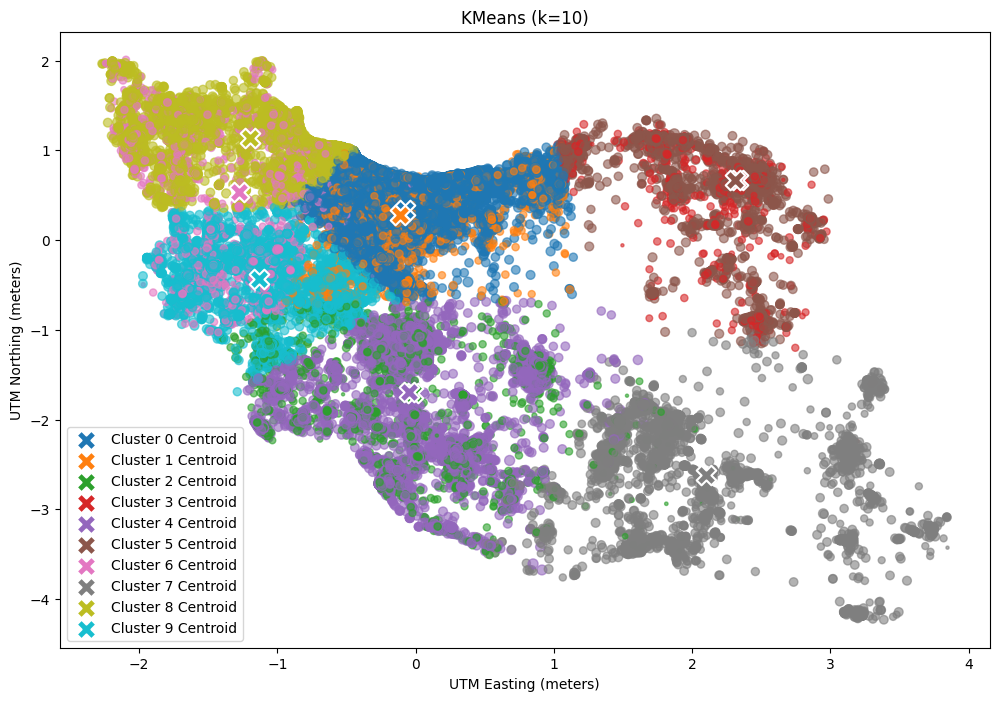

In [20]:
sizes = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min()) * 50 + 5

cmap = plt.get_cmap('tab10')

plt.figure(figsize=(12,8))

plt.scatter(df['utm_x'], df['utm_y'], c=labels, cmap=cmap, s=sizes, alpha=0.6)


for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='X', c=[cmap(i)], s=200, 
                edgecolor='white', linewidth=1.5, label=f'Cluster {i} Centroid')

plt.xlabel('UTM Easting (meters)')
plt.ylabel('UTM Northing (meters)')
plt.title('KMeans (k=10)')
plt.legend()
plt.show()

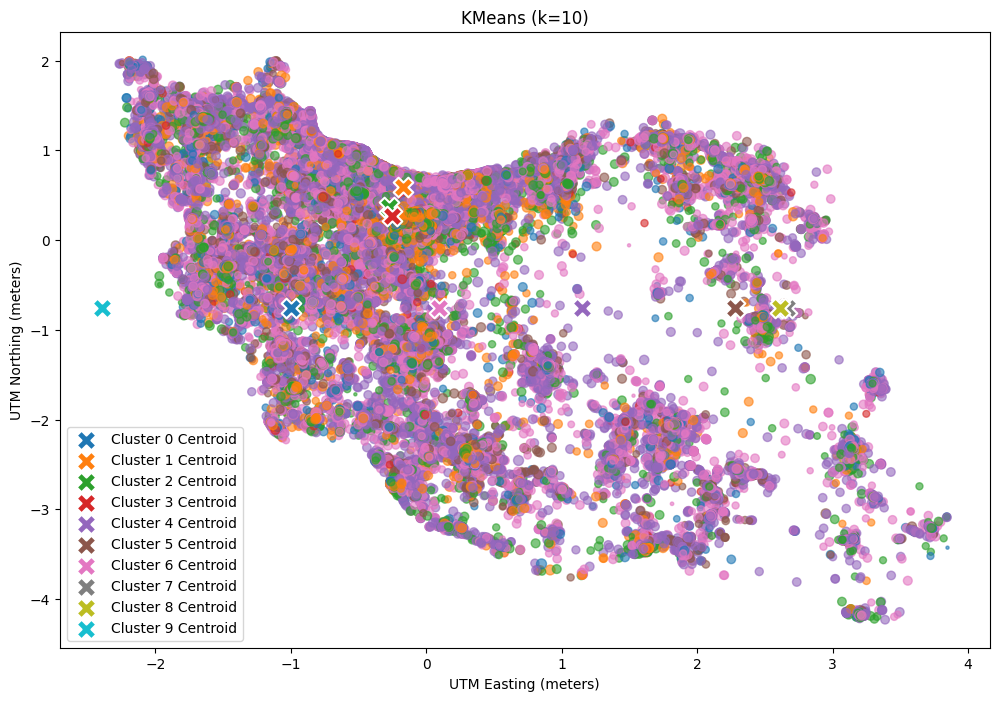

In [21]:

X = df.copy() 

k = 10
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sizes = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min()) * 50 + 5

cmap = plt.get_cmap('tab10')

plt.figure(figsize=(12,8))

plt.scatter(df['utm_x'], df['utm_y'], c=labels, cmap=cmap, s=sizes, alpha=0.6)


for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='X', c=[cmap(i)], s=200, 
                edgecolor='white', linewidth=1.5, label=f'Cluster {i} Centroid')

plt.xlabel('UTM Easting (meters)')
plt.ylabel('UTM Northing (meters)')
plt.title('KMeans (k=10)')
plt.legend()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601996 entries, 0 to 601995
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   building_size                  601996 non-null  float64
 1   floor                          601996 non-null  float64
 2   rooms_count                    601996 non-null  float64
 3   has_balcony                    601996 non-null  float64
 4   has_elevator                   601996 non-null  float64
 5   has_warehouse                  601996 non-null  float64
 6   has_parking                    601996 non-null  float64
 7   is_rebuilt                     601996 non-null  float64
 8   has_warm_water_provider        601996 non-null  float64
 9   apartment                      601996 non-null  float64
 10  house-villa                    601996 non-null  float64
 11  industry-agriculture-business  601996 non-null  float64
 12  office                        

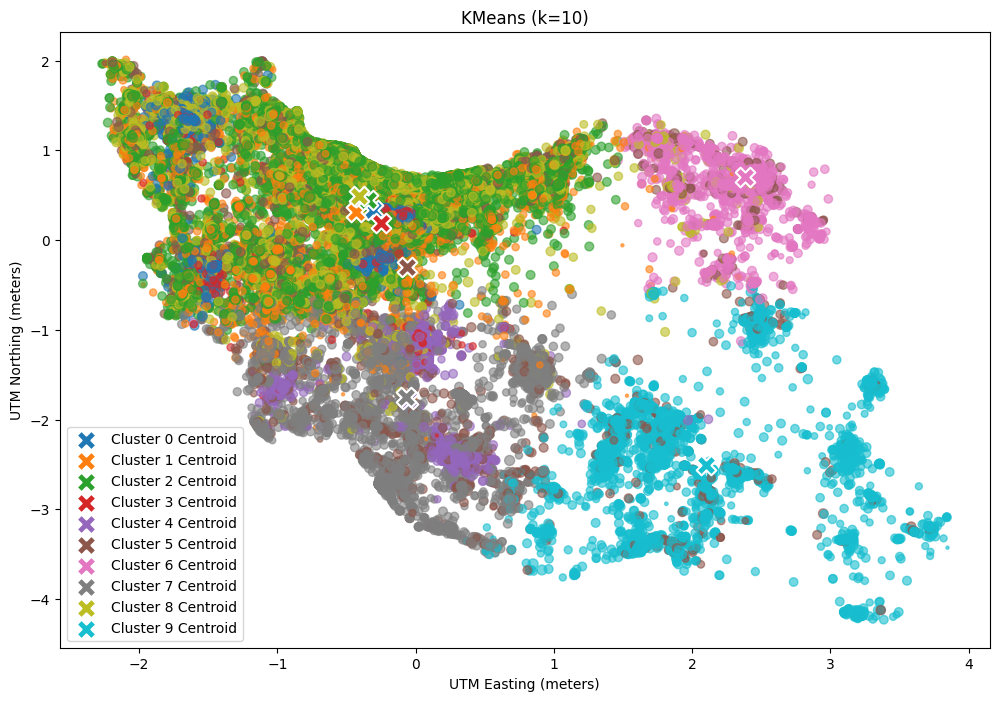

In [23]:

features = ['utm_x', 'utm_y', 'price' , 'metropolis' , 'building_size']
X = df[features].values


k = 10
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sizes = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min()) * 50 + 5

cmap = plt.get_cmap('tab10')

plt.figure(figsize=(12,8))

plt.scatter(df['utm_x'], df['utm_y'], c=labels, cmap=cmap, s=sizes, alpha=0.6)


for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='X', c=[cmap(i)], s=200, 
                edgecolor='white', linewidth=1.5, label=f'Cluster {i} Centroid')

plt.xlabel('UTM Easting (meters)')
plt.ylabel('UTM Northing (meters)')
plt.title('KMeans (k=10)')
plt.legend()
plt.show()

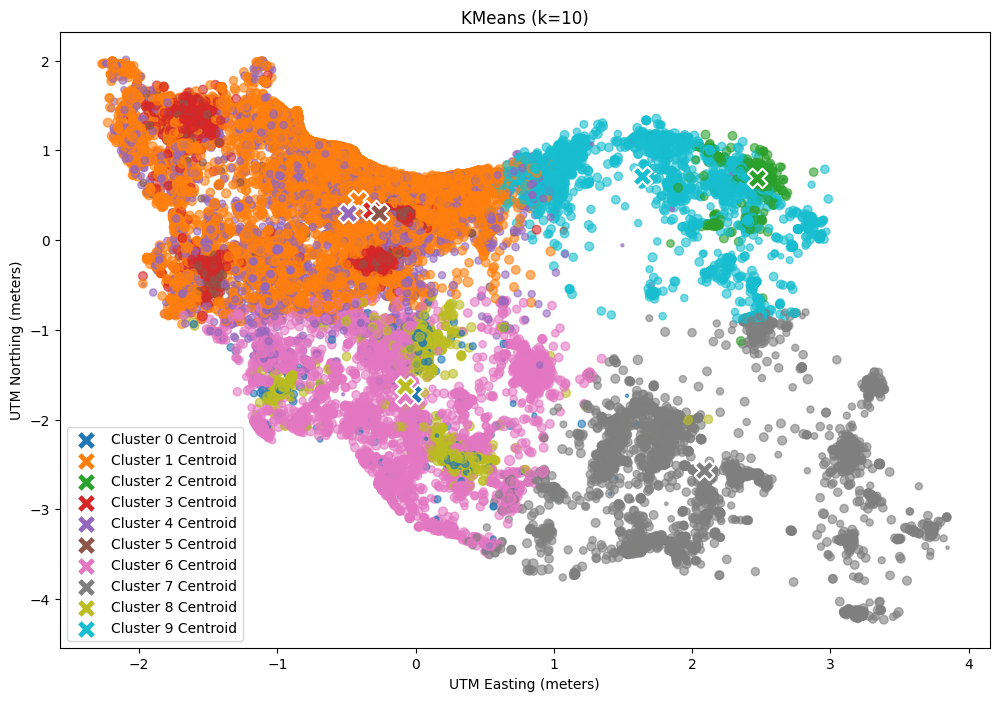

In [24]:

features = ['utm_x', 'utm_y', 'price' , 'metropolis' ]
X = df[features].values


k = 10
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sizes = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min()) * 50 + 5

cmap = plt.get_cmap('tab10')

plt.figure(figsize=(12,8))

plt.scatter(df['utm_x'], df['utm_y'], c=labels, cmap=cmap, s=sizes, alpha=0.6)


for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='X', c=[cmap(i)], s=200, 
                edgecolor='white', linewidth=1.5, label=f'Cluster {i} Centroid')

plt.xlabel('UTM Easting (meters)')
plt.ylabel('UTM Northing (meters)')
plt.title('KMeans (k=10)')
plt.legend()
plt.show()

In [25]:
from tqdm import tqdm 

features = ['utm_x', 'utm_y', 'price']
X = df[features].values

wcss = []

for k in tqdm(range(1, 21), desc="Running KMeans"):  
    kmeans = KMeans(n_clusters=k , n_init=20 , random_state=42 , max_iter=500)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  

Running KMeans: 100%|██████████████████████████████████████████████████████████████████| 20/20 [02:14<00:00,  6.72s/it]


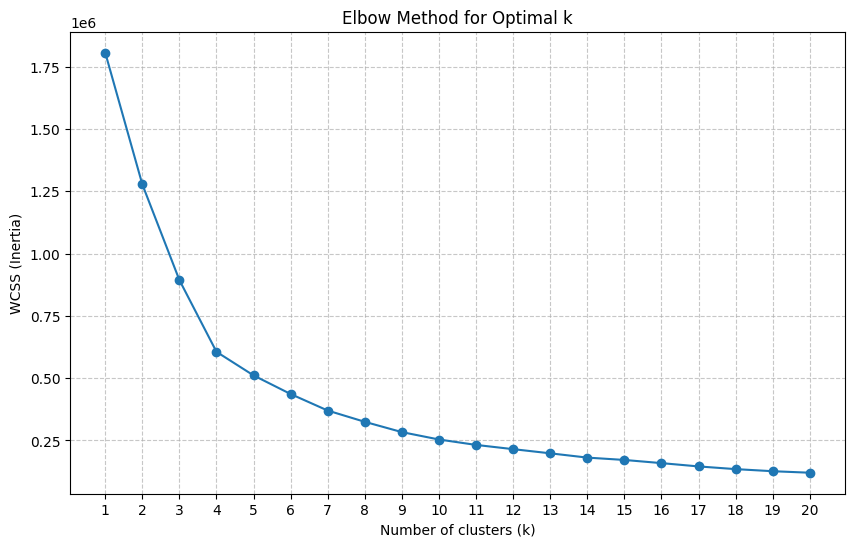

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21), wcss, marker='o')

plt.xticks(range(1,21))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [27]:
features = ['utm_x', 'utm_y', 'price']
X = df[features].copy()

sample_size = 200000
n_percentiles = 20 

percentiles = np.percentile(X['price'], np.linspace(0, 100, n_percentiles+1))
sample_idx = []

for i in range(n_percentiles):
    mask = (X['price'] >= percentiles[i]) & (X['price'] < percentiles[i+1])
    idx_in_bin = X[mask].index.tolist()
    
    n_samples_bin = max(1, int(sample_size / n_percentiles))
    
    if len(idx_in_bin) > 0:
        sample_idx.extend(np.random.choice(idx_in_bin, size=min(n_samples_bin, len(idx_in_bin)), replace=False))

X_sample = X.loc[sample_idx].values


In [28]:
# features = ['utm_x', 'utm_y', 'price']
# X_sample = df[features].copy()

In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

sil_scores = []

for k in tqdm(range(2, 9), desc="Running MiniBatchKMeans"):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=10000, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    sil_scores.append(silhouette_score(X_sample, labels))

Running MiniBatchKMeans: 100%|██████████████████████████████████████████████████████████| 7/7 [55:55<00:00, 479.41s/it]


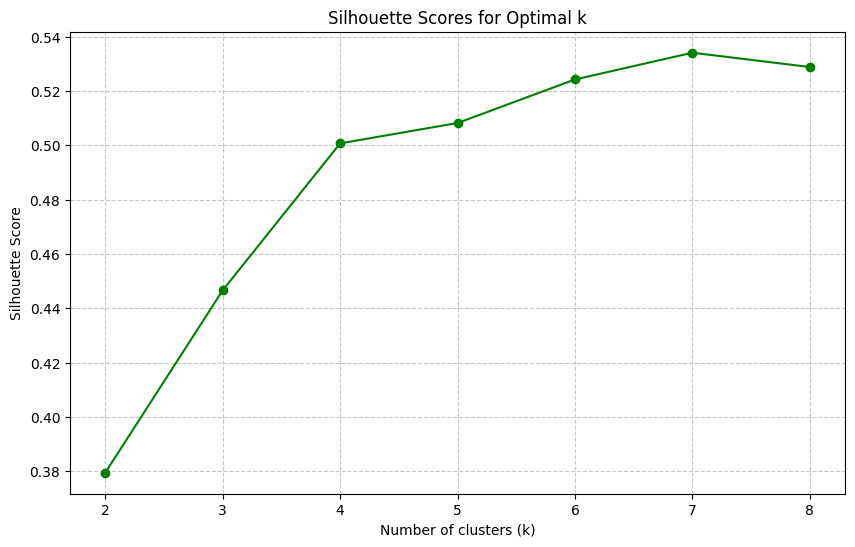

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(2,9), sil_scores, marker='o', color='green')

plt.xticks(range(2,9))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.show()

In [31]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

dbi_scores = []
ch_scores = []

for k in tqdm(range(2, 9) , desc='Running MiniBatchKMeans'):
    kmeans = KMeans(n_clusters=k , n_init=20 , random_state=42 , max_iter=500)
    labels = kmeans.fit_predict(X)
    dbi_scores.append(davies_bouldin_score(X , labels))
    ch_scores.append(calinski_harabasz_score(X , labels))

Running MiniBatchKMeans: 100%|███████████████████████████████████████████████████████████| 7/7 [00:25<00:00,  3.70s/it]


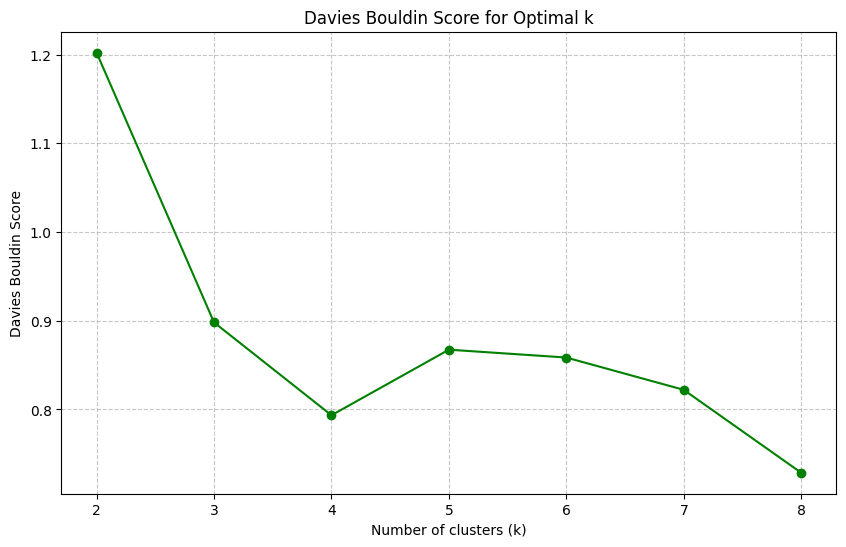

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(2,9), dbi_scores, marker='o', color='green')

plt.xticks(range(2,9))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score for Optimal k')
plt.show()

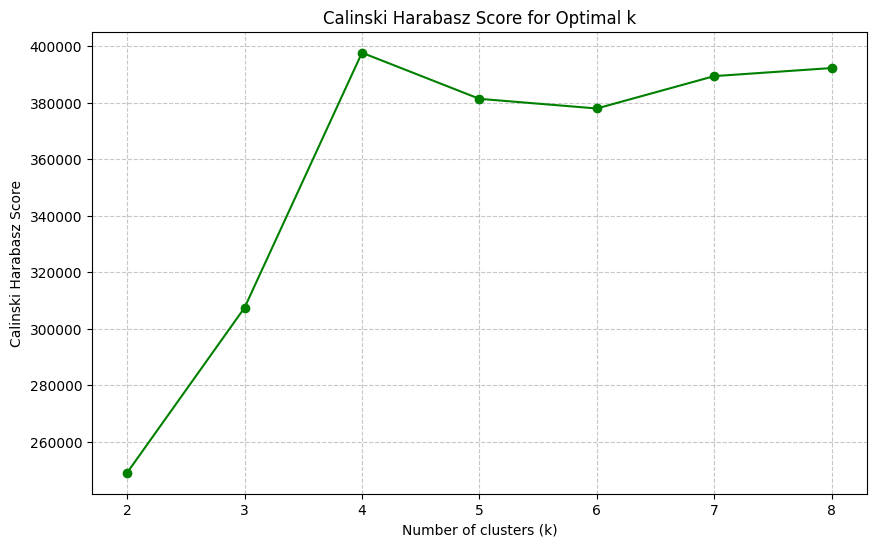

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(2,9), ch_scores, marker='o', color='green')

plt.xticks(range(2,9))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski Harabasz Score')
plt.title('Calinski Harabasz Score for Optimal k')
plt.show()

In [51]:
features = ['utm_x', 'utm_y', 'price']
X = df[features].values  

k = 4
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

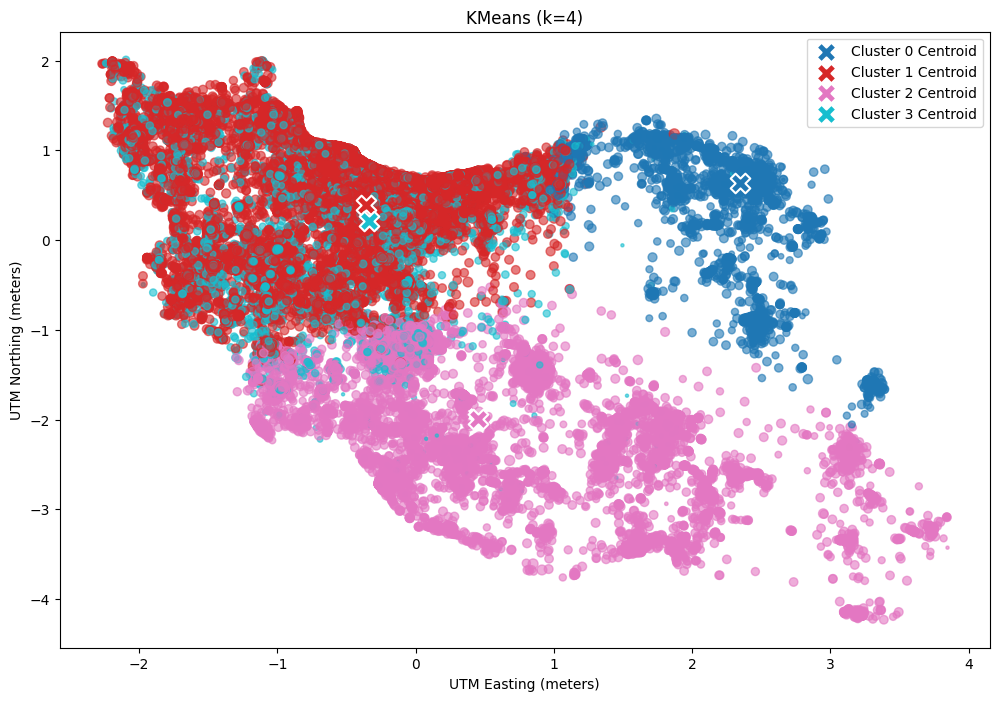

In [52]:
import matplotlib as mpl


norm = mpl.colors.Normalize(vmin=0, vmax=k-1)
cmap = plt.get_cmap('tab10')

plt.figure(figsize=(12,8))

plt.scatter(df['utm_x'], df['utm_y'], c=labels, cmap=cmap, norm=norm, s=sizes, alpha=0.6)

for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='X', 
                c=[cmap(norm(i))], s=200, edgecolor='white', linewidth=1.5, 
                label=f'Cluster {i} Centroid')

plt.xlabel('UTM Easting (meters)')
plt.ylabel('UTM Northing (meters)')
plt.title('KMeans (k=4)')
plt.legend()
plt.show()

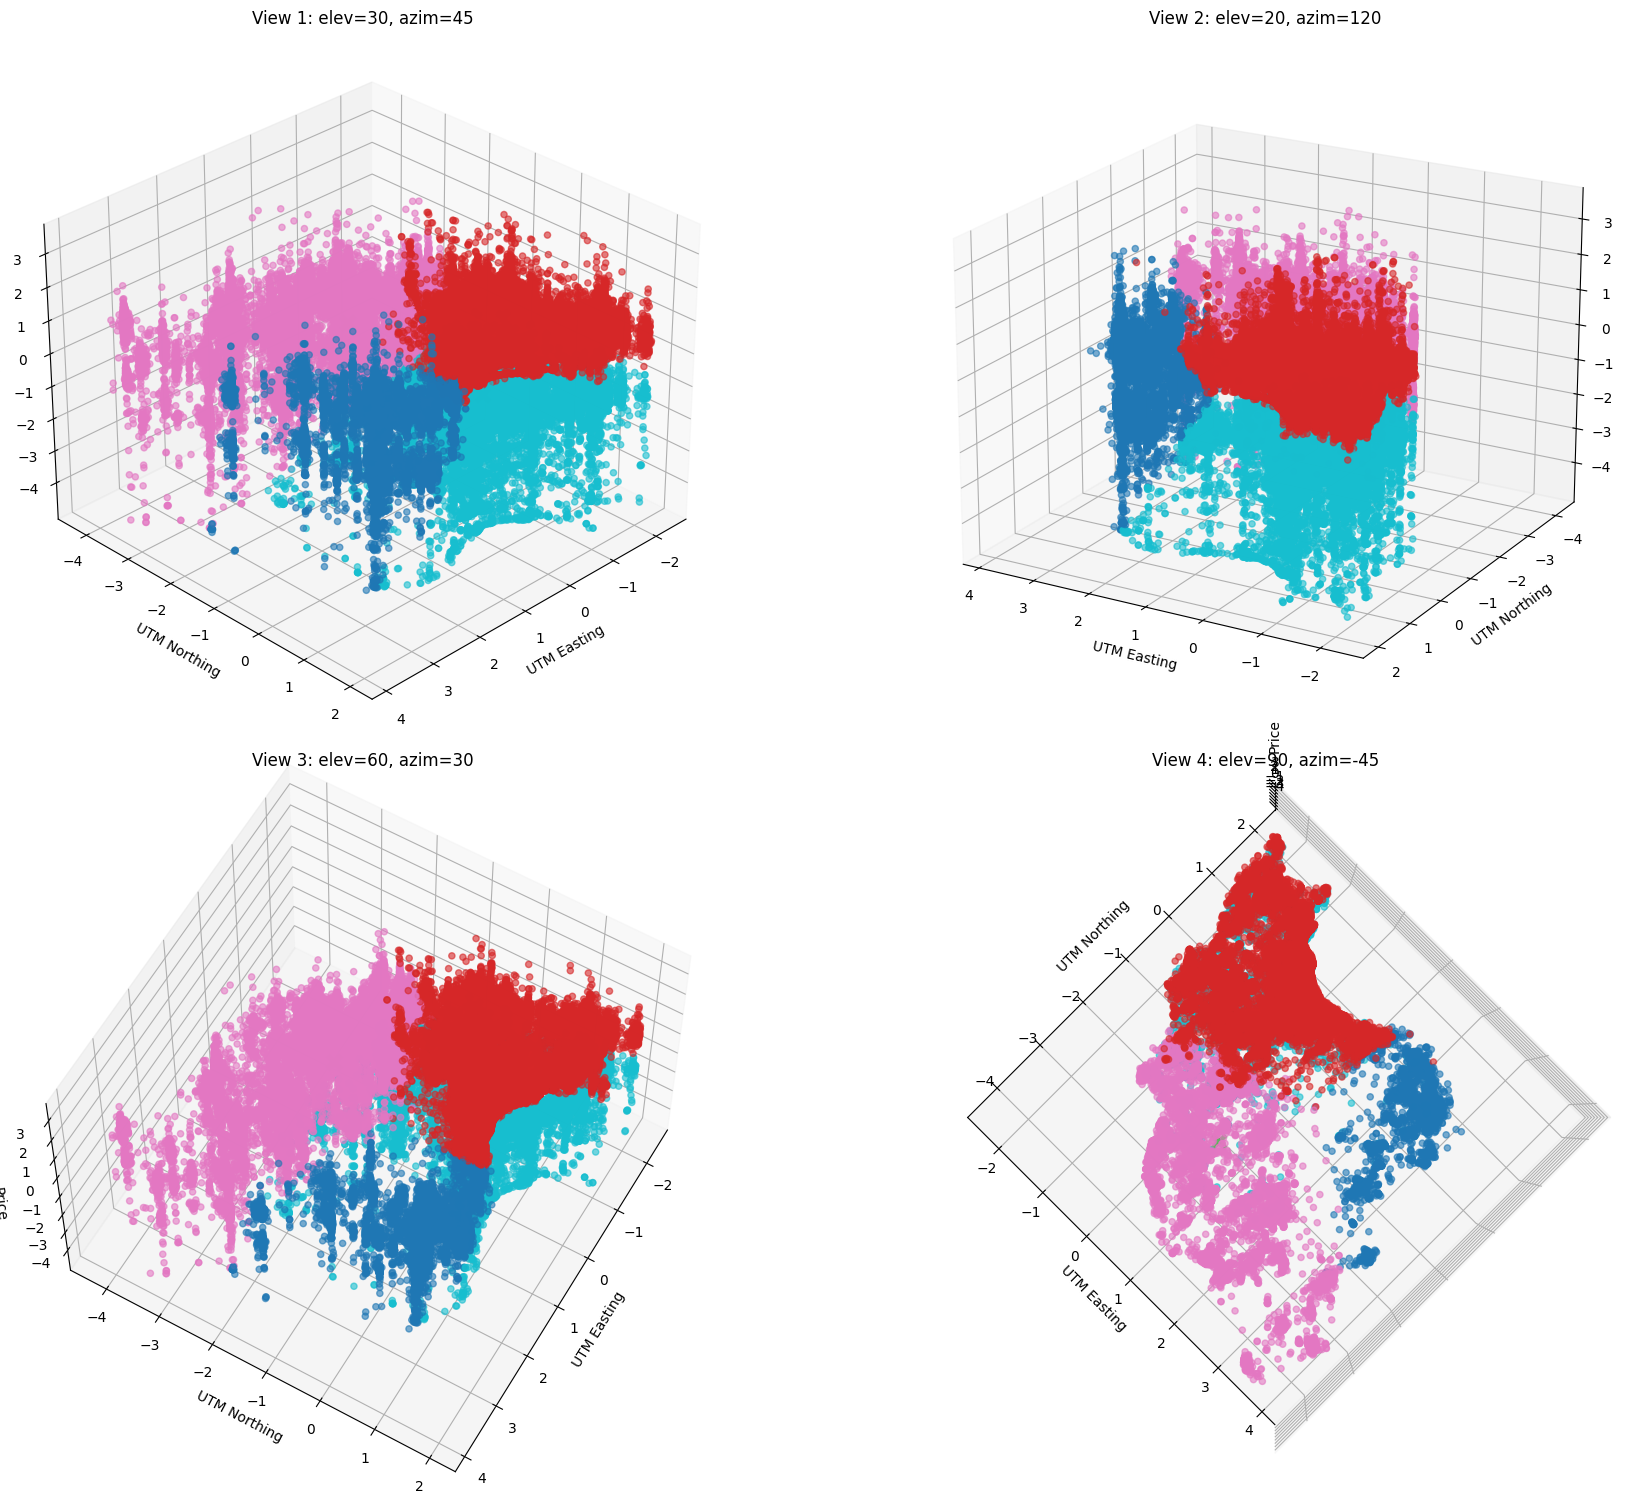

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,15))

views = [
    (30, 45),   
    (20, 120),  
    (60, 30),   
    (90, -45)   
]

for i, (elev, azim) in enumerate(views, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    
    ax.scatter(df['utm_x'], df['utm_y'], df['price'], 
               c=labels, cmap='tab10', s=20, alpha=0.6)
    
    ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
               c=[plt.get_cmap('tab10')(i) for i in range(k)],
               marker='X', s=200, edgecolor='white', linewidth=1.5)
    
    ax.set_xlabel('UTM Easting')
    ax.set_ylabel('UTM Northing')
    ax.set_zlabel('Price')
    ax.set_title(f'View {i}: elev={elev}, azim={azim}')
    
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

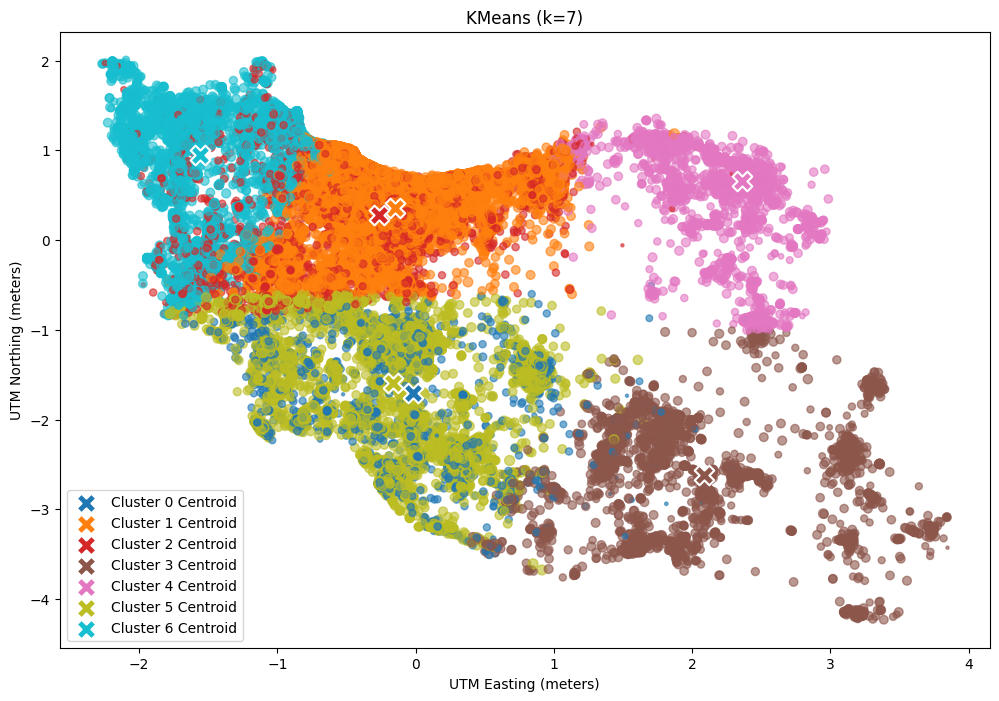

In [54]:
features = ['utm_x', 'utm_y', 'price']
X = df[features].values  

k = 7
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
norm = mpl.colors.Normalize(vmin=0, vmax=k-1)
cmap = plt.get_cmap('tab10')

plt.figure(figsize=(12,8))

plt.scatter(df['utm_x'], df['utm_y'], c=labels, cmap=cmap, norm=norm, s=sizes, alpha=0.6)

for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='X', 
                c=[cmap(norm(i))], s=200, edgecolor='white', linewidth=1.5, 
                label=f'Cluster {i} Centroid')

plt.xlabel('UTM Easting (meters)')
plt.ylabel('UTM Northing (meters)')
plt.title('KMeans (k=7)')
plt.legend()
plt.show()

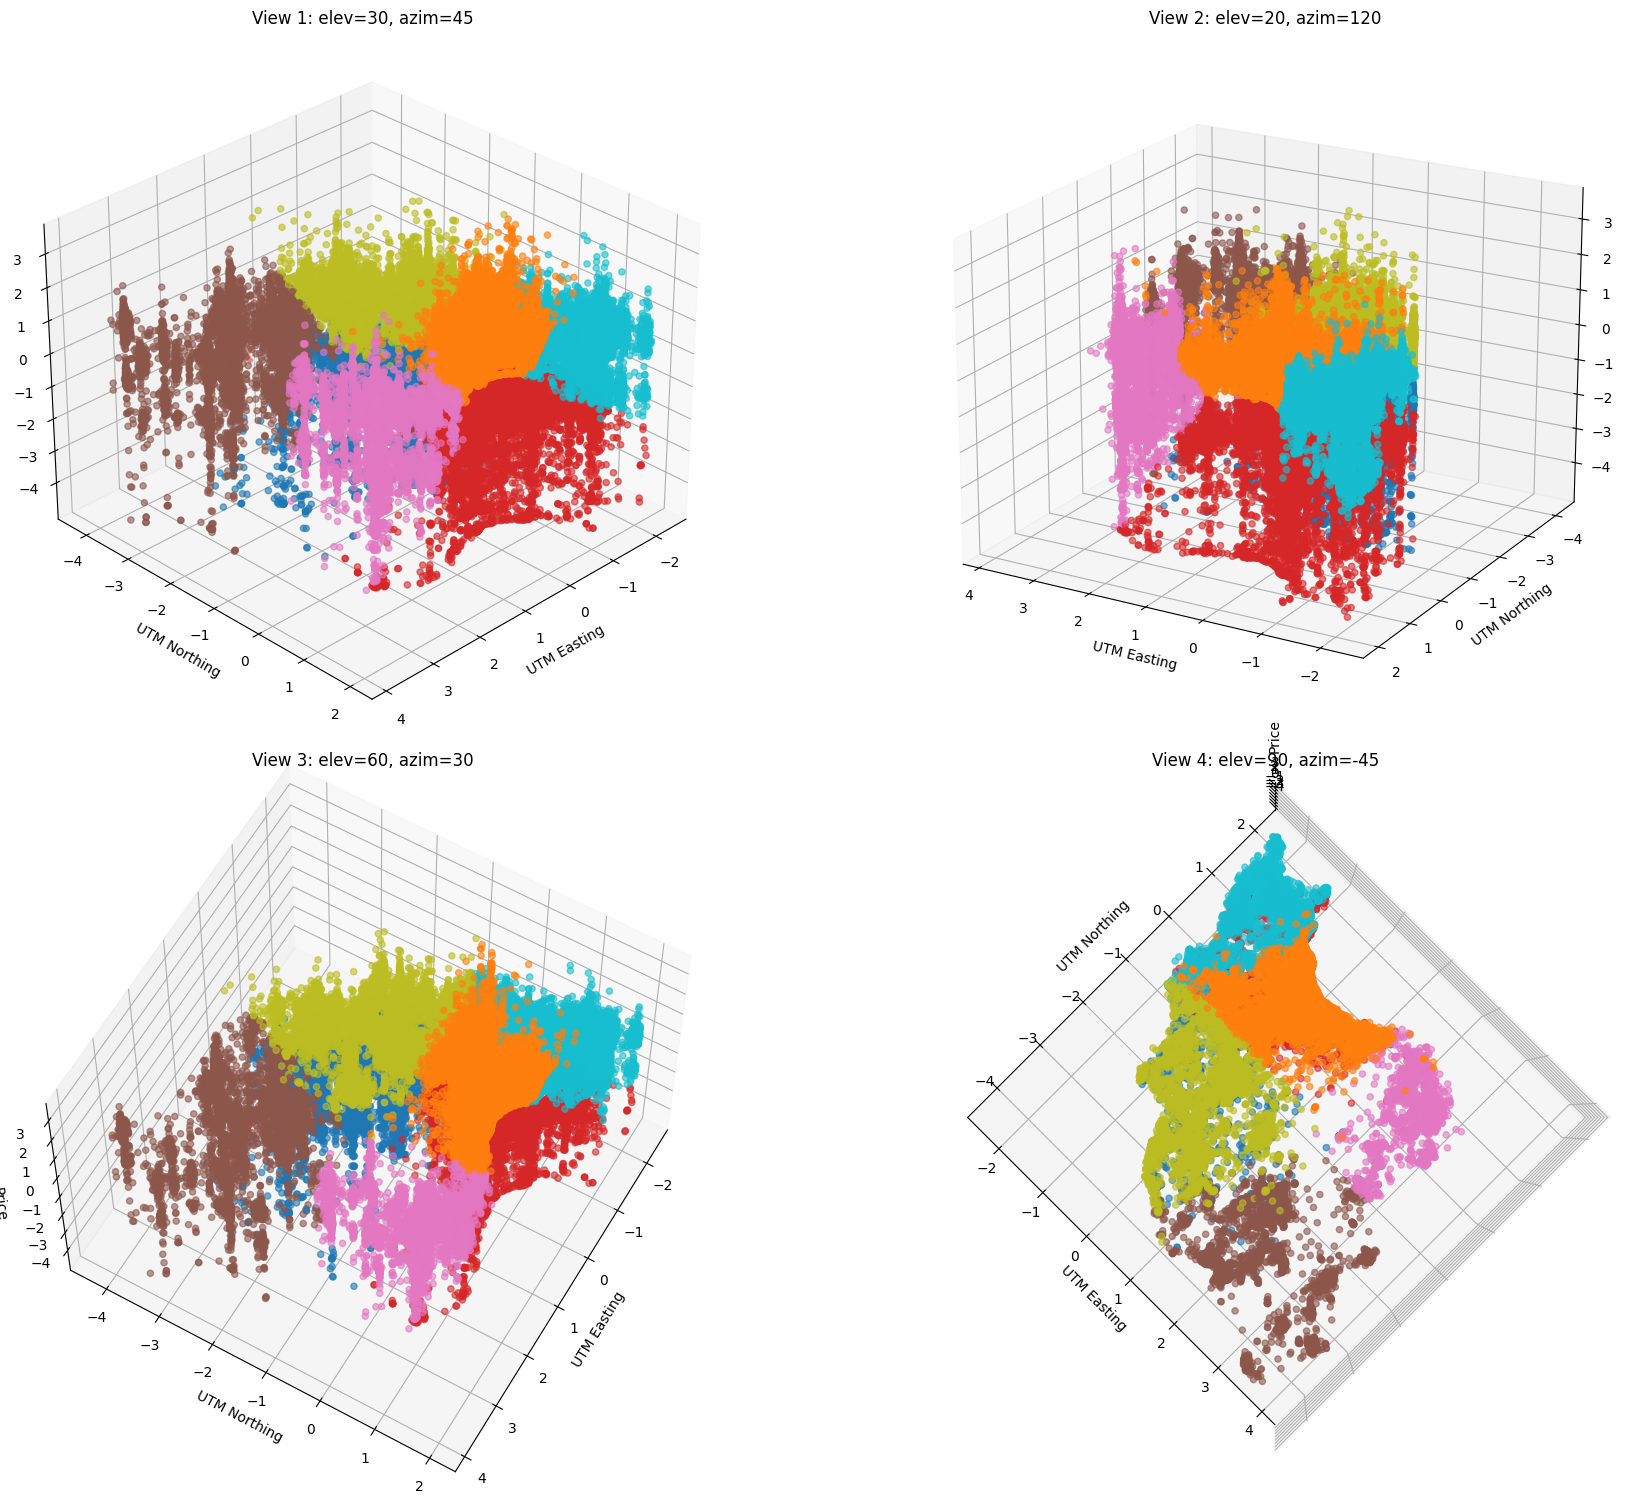

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,15))

views = [
    (30, 45),   
    (20, 120),  
    (60, 30),   
    (90, -45)   
]

for i, (elev, azim) in enumerate(views, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    
    ax.scatter(df['utm_x'], df['utm_y'], df['price'], 
               c=labels, cmap='tab10', s=20, alpha=0.6)
    
    ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
               c=[plt.get_cmap('tab10')(i) for i in range(k)],
               marker='X', s=200, edgecolor='white', linewidth=1.5)
    
    ax.set_xlabel('UTM Easting')
    ax.set_ylabel('UTM Northing')
    ax.set_zlabel('Price')
    ax.set_title(f'View {i}: elev={elev}, azim={azim}')
    
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

In [56]:
from sklearn.cluster import DBSCAN

# sample = df.sample(n=100000, random_state=42)
# X_sample = sample[['utm_x','utm_y','price']].values

dbscan = DBSCAN(eps=0.5, min_samples=50)
labels = dbscan.fit_predict(X_sample)

In [57]:
set(labels)

{-1, 0, 1, 2, 3}

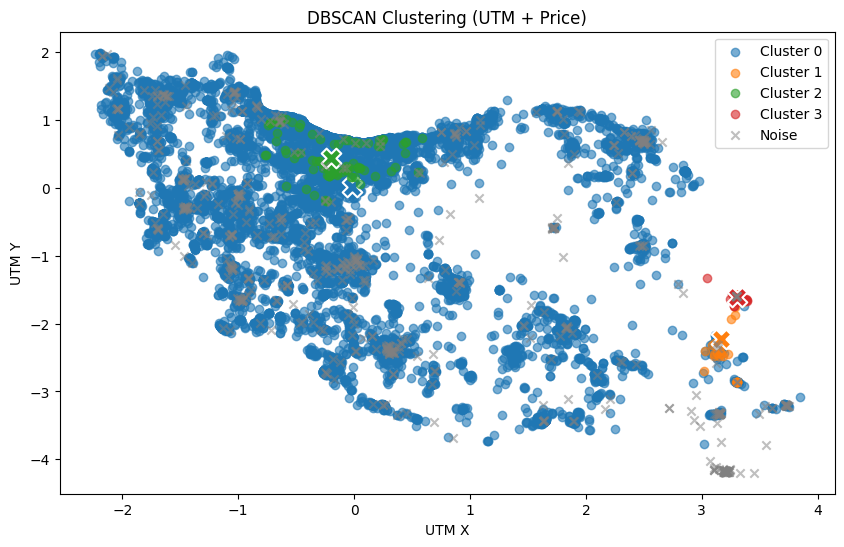

In [58]:
plt.figure(figsize=(10,6))
unique_labels = set(labels)
colors = plt.cm.tab10.colors 

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X_sample[class_member_mask]   
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='grey', marker='x', label='Noise', alpha=0.5)
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[colors[k % len(colors)]], marker='o', label=f'Cluster {k}', alpha=0.6)
        
        centroid = xy.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], c=[colors[k % len(colors)]], 
                    marker='X', s=200, edgecolor='white', linewidth=1.5)

plt.xlabel('UTM X')
plt.ylabel('UTM Y')
plt.title('DBSCAN Clustering (UTM + Price)')
plt.legend()
plt.show()


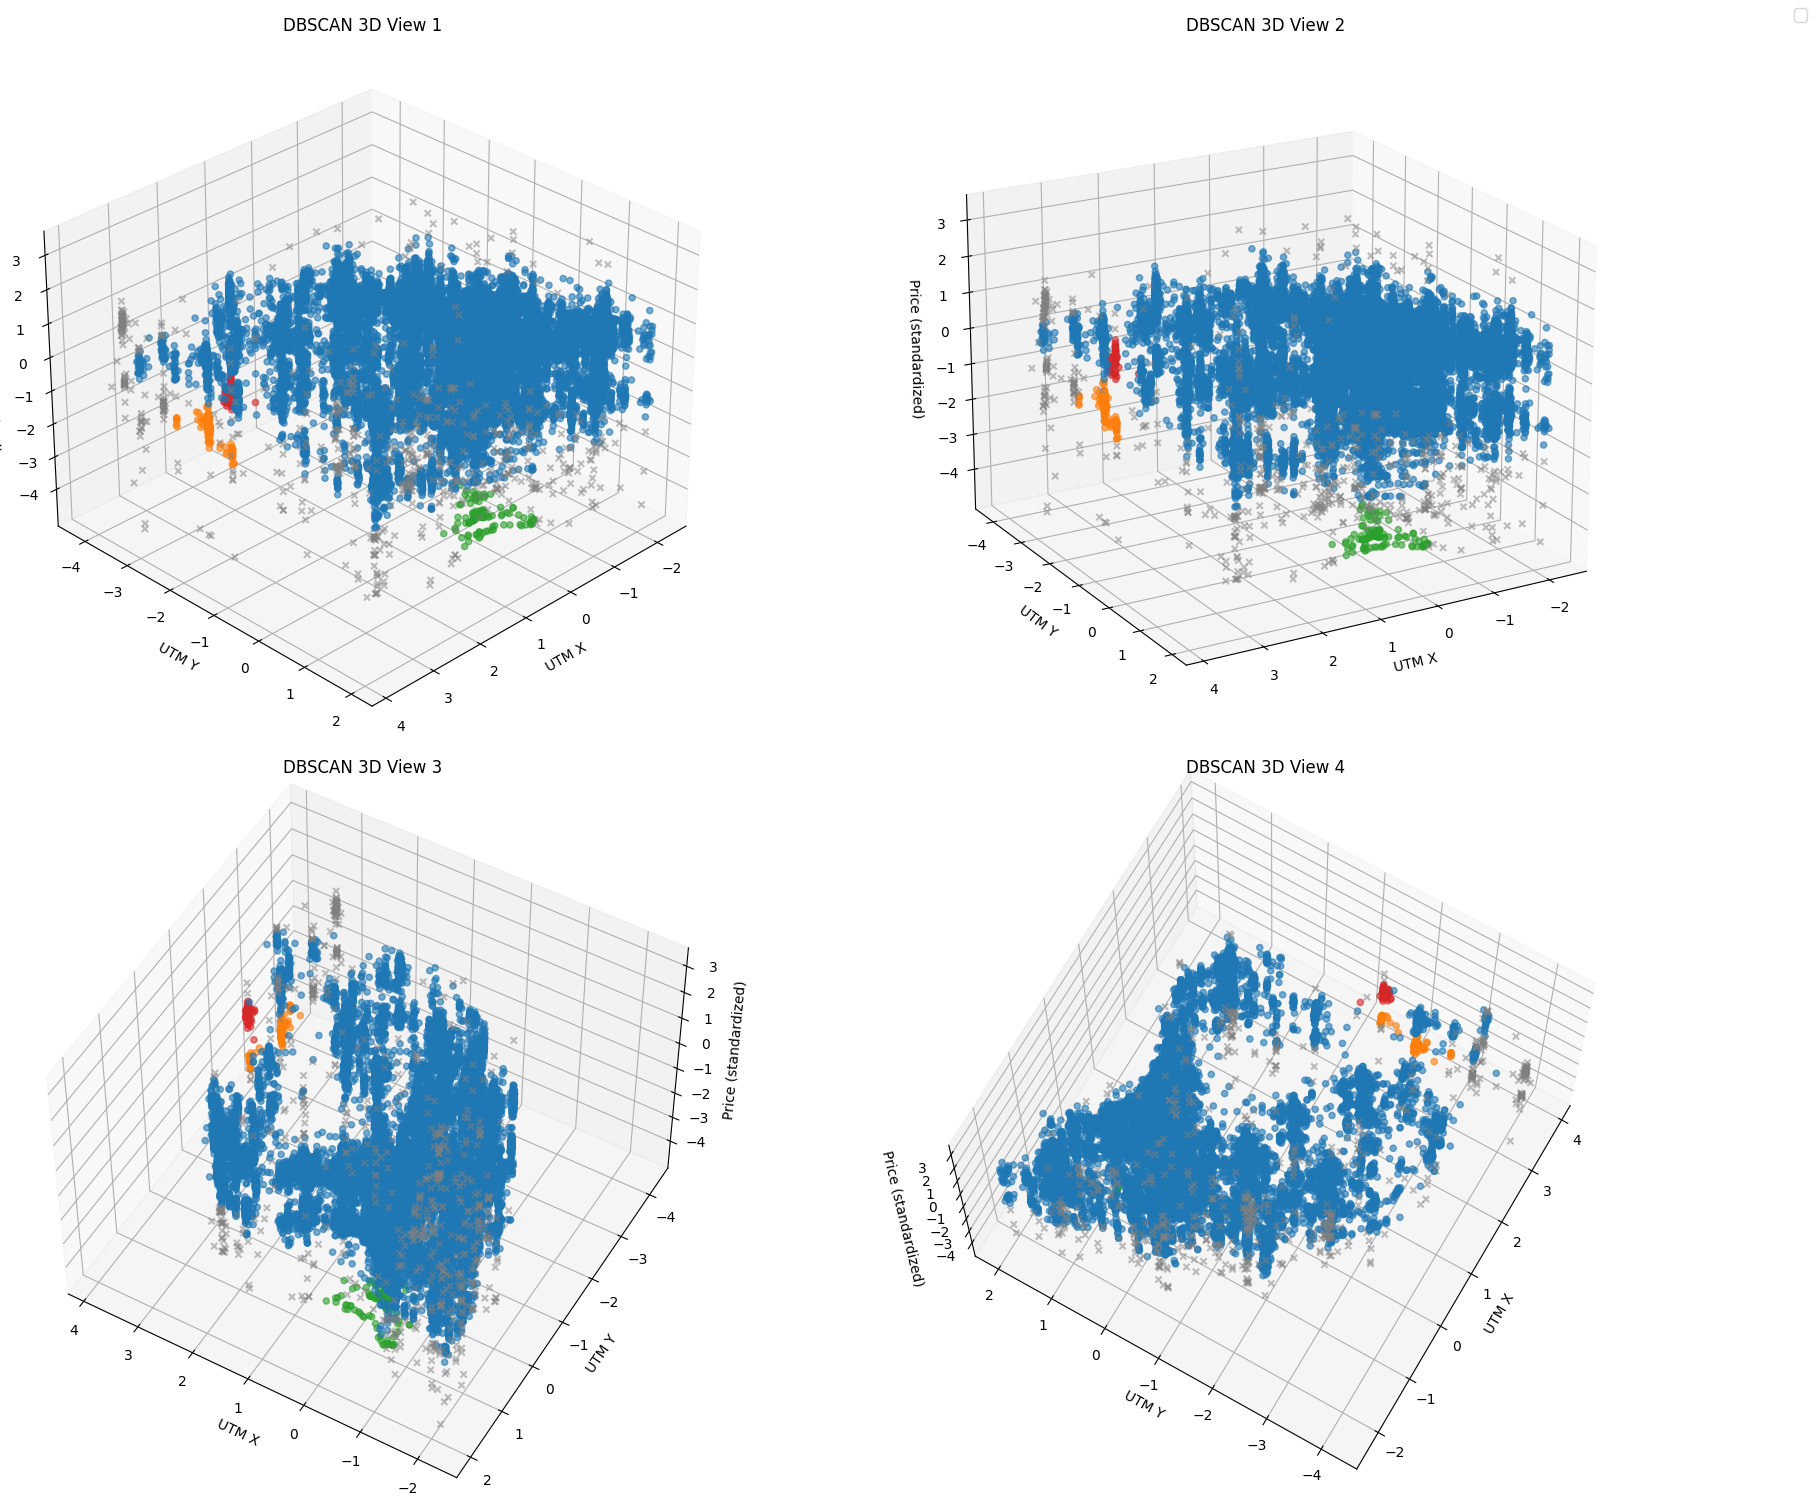

In [59]:
from mpl_toolkits.mplot3d import Axes3D

unique_labels = set(labels)
colors_map = plt.cm.tab10.colors

views = [(30, 45), (20, 60), (50, 120), (70, 210)]

fig = plt.figure(figsize=(20,15))

for i, (elev, azim) in enumerate(views, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    for k in unique_labels:
        class_member_mask = (labels == k)
        xyz = X_sample[class_member_mask]
        if k == -1:
            ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='grey', marker='x', alpha=0.5, label='Noise' if i==1 else "")
        else:
            ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c=[colors_map[k % len(colors_map)]],
                       marker='o', alpha=0.6, label=f'Cluster {k}' if i==1 else "")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('UTM X')
    ax.set_ylabel('UTM Y')
    ax.set_zlabel('Price (standardized)')
    ax.set_title(f'DBSCAN 3D View {i}')

handles, labels_text = ax.get_legend_handles_labels()
fig.legend(handles, labels_text, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


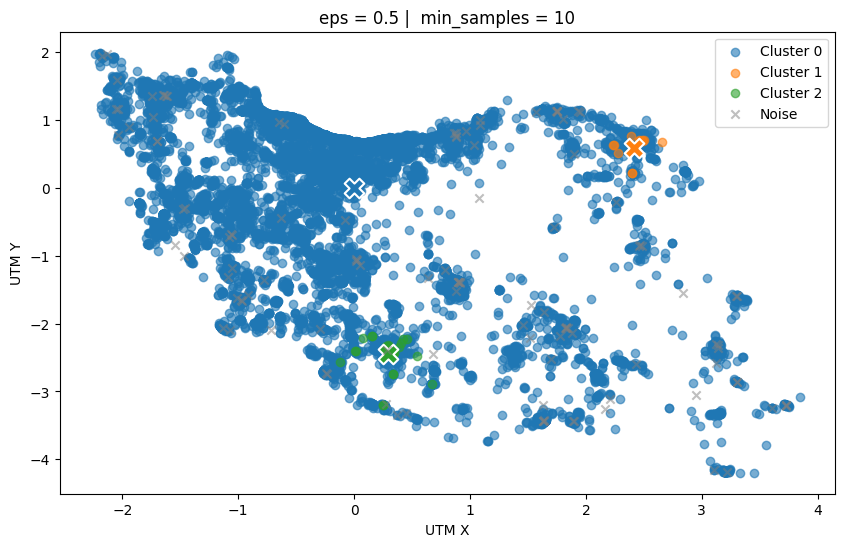

In [60]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X_sample)
plt.figure(figsize=(10,6))
unique_labels = set(labels)
colors = plt.cm.tab10.colors 

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X_sample[class_member_mask]   
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='grey', marker='x', label='Noise', alpha=0.5)
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[colors[k % len(colors)]], marker='o', label=f'Cluster {k}', alpha=0.6)
        
        centroid = xy.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], c=[colors[k % len(colors)]], 
                    marker='X', s=200, edgecolor='white', linewidth=1.5)

plt.xlabel('UTM X')
plt.ylabel('UTM Y')
plt.title('eps = 0.5 |  min_samples = 10')
plt.legend()
plt.show()

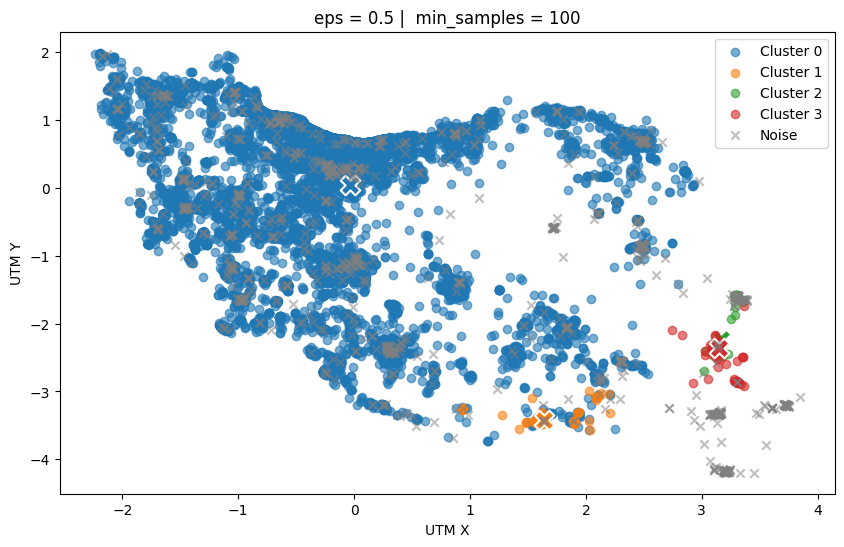

In [61]:
dbscan = DBSCAN(eps=0.5, min_samples=100)
labels = dbscan.fit_predict(X_sample)
plt.figure(figsize=(10,6))
unique_labels = set(labels)
colors = plt.cm.tab10.colors 

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X_sample[class_member_mask]   
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='grey', marker='x', label='Noise', alpha=0.5)
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[colors[k % len(colors)]], marker='o', label=f'Cluster {k}', alpha=0.6)
        
        centroid = xy.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], c=[colors[k % len(colors)]], 
                    marker='X', s=200, edgecolor='white', linewidth=1.5)

plt.xlabel('UTM X')
plt.ylabel('UTM Y')
plt.title('eps = 0.5 |  min_samples = 100')
plt.legend()
plt.show()

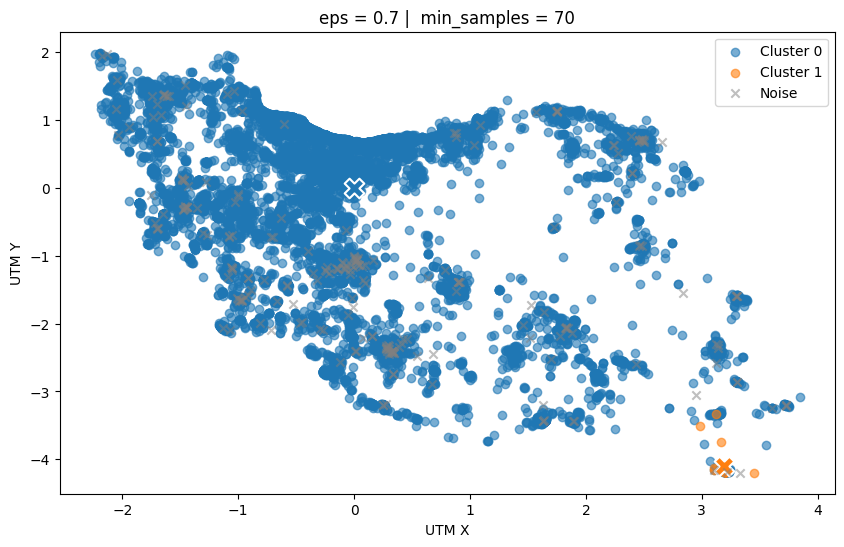

In [62]:
dbscan = DBSCAN(eps=0.7, min_samples=50)
labels = dbscan.fit_predict(X_sample)
plt.figure(figsize=(10,6))
unique_labels = set(labels)
colors = plt.cm.tab10.colors 

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X_sample[class_member_mask]   
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='grey', marker='x', label='Noise', alpha=0.5)
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[colors[k % len(colors)]], marker='o', label=f'Cluster {k}', alpha=0.6)
        
        centroid = xy.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], c=[colors[k % len(colors)]], 
                    marker='X', s=200, edgecolor='white', linewidth=1.5)

plt.xlabel('UTM X')
plt.ylabel('UTM Y')
plt.title('eps = 0.7 |  min_samples = 70')
plt.legend()
plt.show()

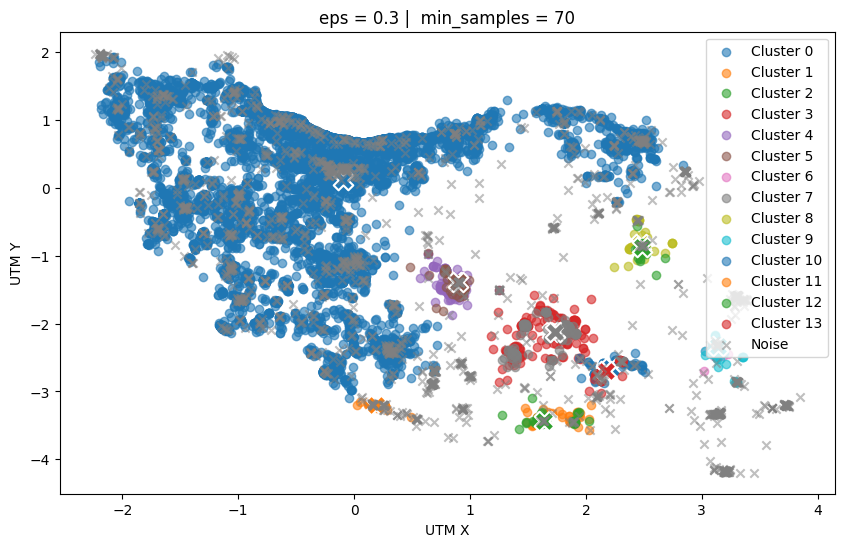

In [63]:
dbscan = DBSCAN(eps=0.3, min_samples=50)
labels = dbscan.fit_predict(X_sample)
plt.figure(figsize=(10,6))
unique_labels = set(labels)
colors = plt.cm.tab10.colors 

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X_sample[class_member_mask]   
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='grey', marker='x', label='Noise', alpha=0.5)
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[colors[k % len(colors)]], marker='o', label=f'Cluster {k}', alpha=0.6)
        
        centroid = xy.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], c=[colors[k % len(colors)]], 
                    marker='X', s=200, edgecolor='white', linewidth=1.5)

plt.xlabel('UTM X')
plt.ylabel('UTM Y')
plt.title('eps = 0.3 |  min_samples = 70')
plt.legend()
plt.show()